In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import matplotlib as plt 
from pylab import figure, show, legend, ylabel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy.stats as stats
from datetime import datetime
import scipy

In [2]:
df = pd.read_csv("cdc_data.csv", names=['Anio', 'Mes', 'Dia','Hora','Altura'], skiprows=[0])

In [3]:
from datetime import datetime
df['Date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Anio'],x[u'Mes'],x[u'Dia'], x[u'Hora']), "%Y %m %d %H"),axis=1)

In [4]:
df_short=df.drop(df.columns[[0,1,2,3]],axis=1)

df_short.head()

,Altura,Date
0,289,2016-01-01 00:00:00
1,323,2016-01-01 01:00:00
2,337,2016-01-01 02:00:00
3,331,2016-01-01 03:00:00
4,309,2016-01-01 04:00:00


In [5]:
df_short['month']=pd.DatetimeIndex(df_short[u'Date']).month
df_enero=df_short.loc[df_short[u'month'] == 1]

In [6]:
time_range=pd.date_range('2016-01-01 00:00:00','2016-01-31 23:00:00',freq='H')

In [7]:
hours=time_range.hour
days=time_range.day
time_since_beginning=(days-1)*24+hours
time_since_beginning

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
df_enero['hour']=time_since_beginning

del df_enero[u'month']
del df_enero[u'Date']
ax=df_enero.plot()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
df_enero.head()

,Altura,hour
0,289,0
1,323,1
2,337,2
3,331,3
4,309,4


In [10]:
df_enero

,Altura,hour
0,289,0
1,323,1
2,337,2
3,331,3
4,309,4
5,280,5
6,249,6
7,222,7
8,202,8
9,186,9


/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


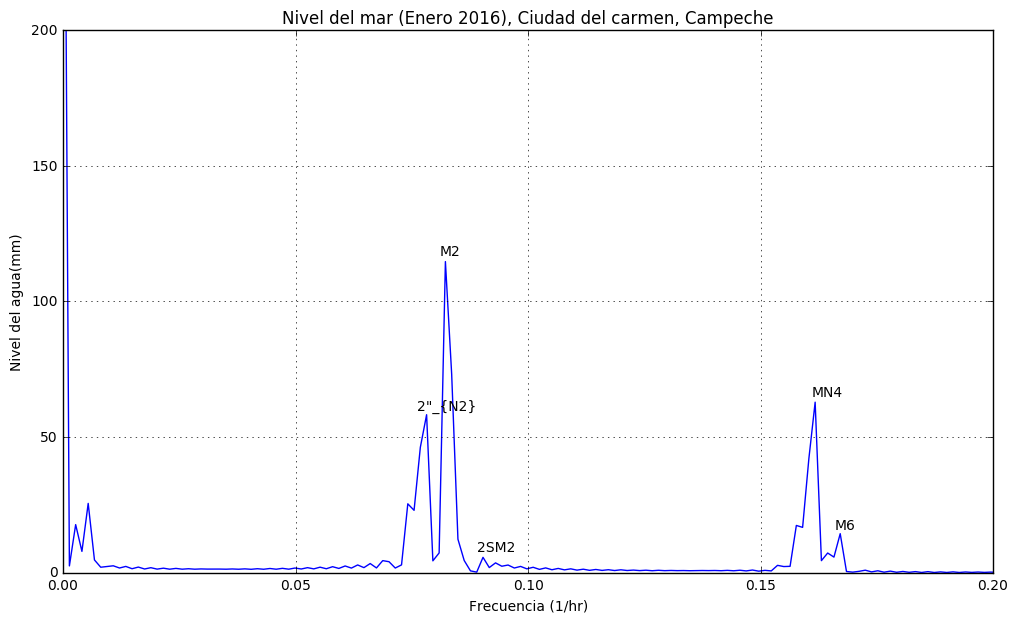

In [14]:
import numpy as np
import matplotlib.pyplot as mplt
from scipy.fftpack import rfft
fig = mplt.gcf()
fig.set_size_inches(12, 7)

N=744
T=1.0
x=df_enero[u'hour']
y=df_enero[u'Altura']
yf=rfft(y)
xf=np.linspace(0.0,1.0/(2.0*T),N/2)
import matplotlib.pyplot as plt
plt.plot(xf,2.0/N* np.abs(yf[0:N/2]))
plt.xlim(0,0.2)
plt.ylim(0,200)
mplt.ylabel('Nivel del agua(mm)')
mplt.xlabel('Frecuencia (1/hr)')
mplt.title('Nivel del mar (Enero 2016), Ciudad del carmen, Campeche')
plt.grid()

plt.text(0.076,60,'2"_{N2}')
#13.1579
plt.text(0.081,117,'M2')
#12.3456
plt.text(0.089,8,'2SM2')
#11.2359
plt.text(0.161,65,'MN4')
#6.2111
plt.text(0.166,16,'M6')
#6.0241
plt.show()

In [12]:
df.describe()

,Anio,Mes,Dia,Hora
count,8784.0,8784.000000,8784.000000,8784.000000
mean,2016.0,6.513661,15.756831,11.500000
std,0.0,3.451430,8.812031,6.922581
min,2016.0,1.000000,1.000000,0.000000
25%,2016.0,4.000000,8.000000,5.750000
50%,2016.0,7.000000,16.000000,11.500000
75%,2016.0,10.000000,23.000000,17.250000
max,2016.0,12.000000,31.000000,23.000000


In [13]:
#Exportar archivo modificado para realizar la actividad 07.
df_enero.to_csv('Act_7_carmen.csv',index=False)